# Task 1 - Iris Flower Classification

Iris flower has three species; setosa, versicolor, and virginica, which differs according to their
measurements. Now assume that you have the measurements of the iris flowers according to
their species, and here your task is to train a machine learning model that can learn from the
measurements of the iris species and classify them.

In [1]:
##Importing Packages

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score

# Loading the dataset	

In [4]:
df = pd.read_csv('iris.csv')

In [5]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [7]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [9]:
df['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

#  Exploratory Data Analysis

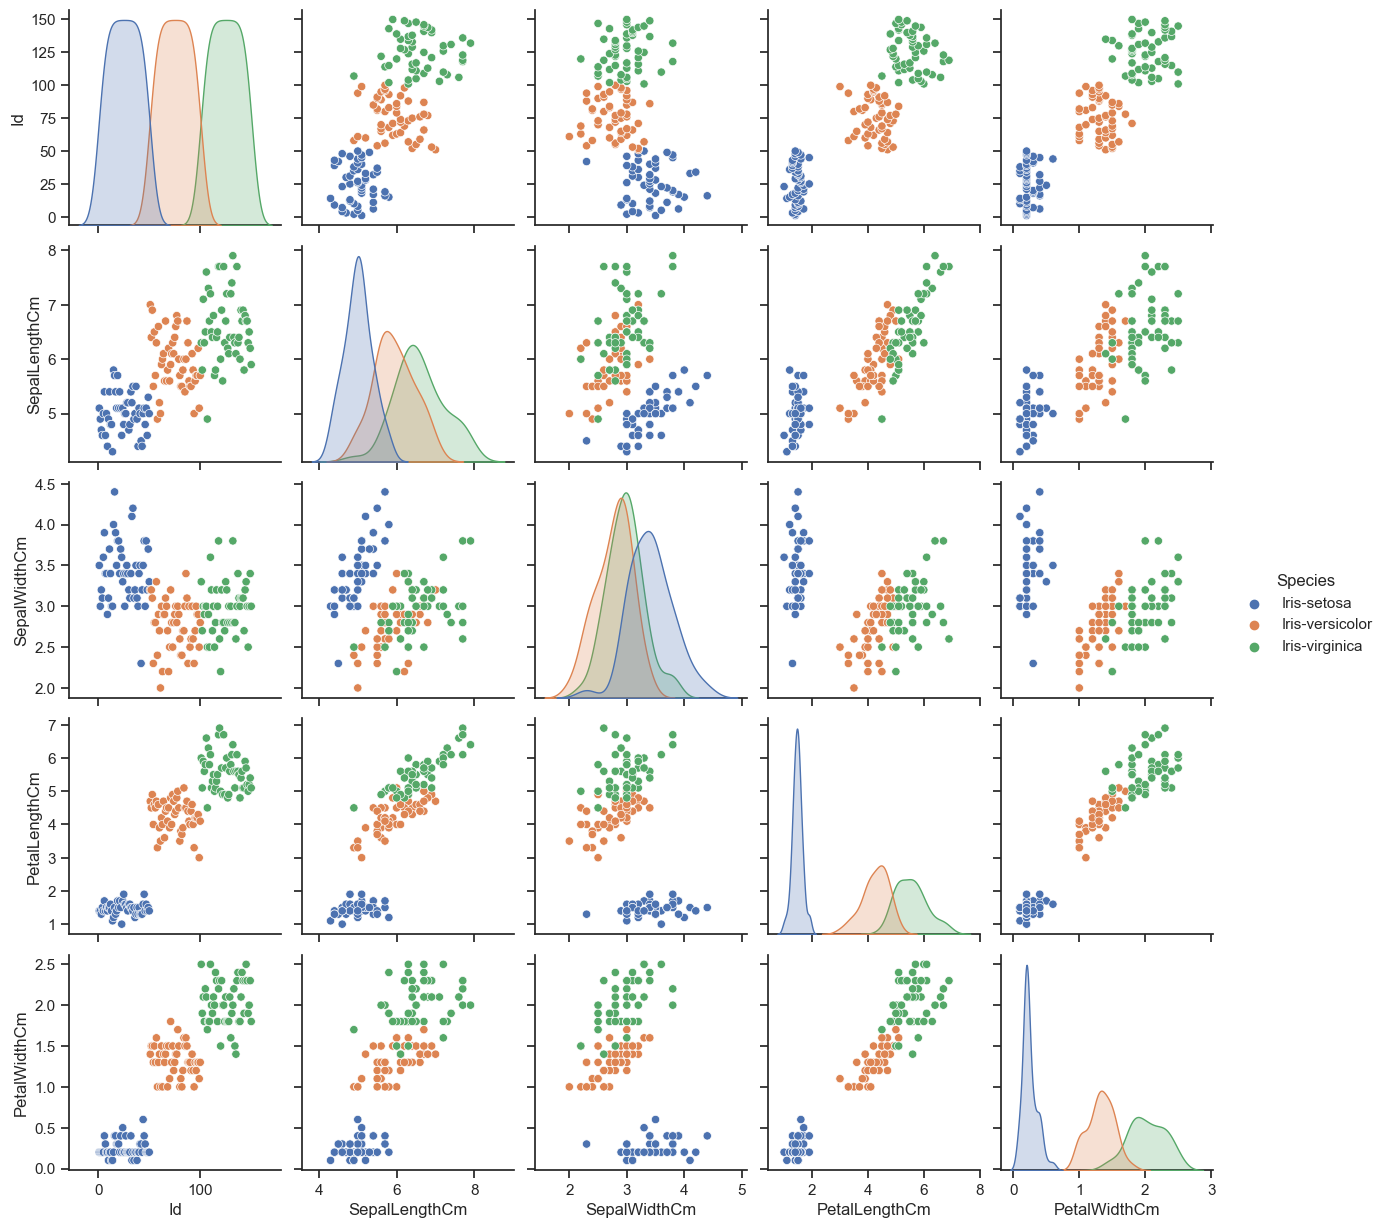

In [10]:
# Visualize the distribution of each feature
sns.set(style="ticks")
sns.pairplot(df, hue='Species')

<Axes: title={'center': 'Feature comparison by Species'}>

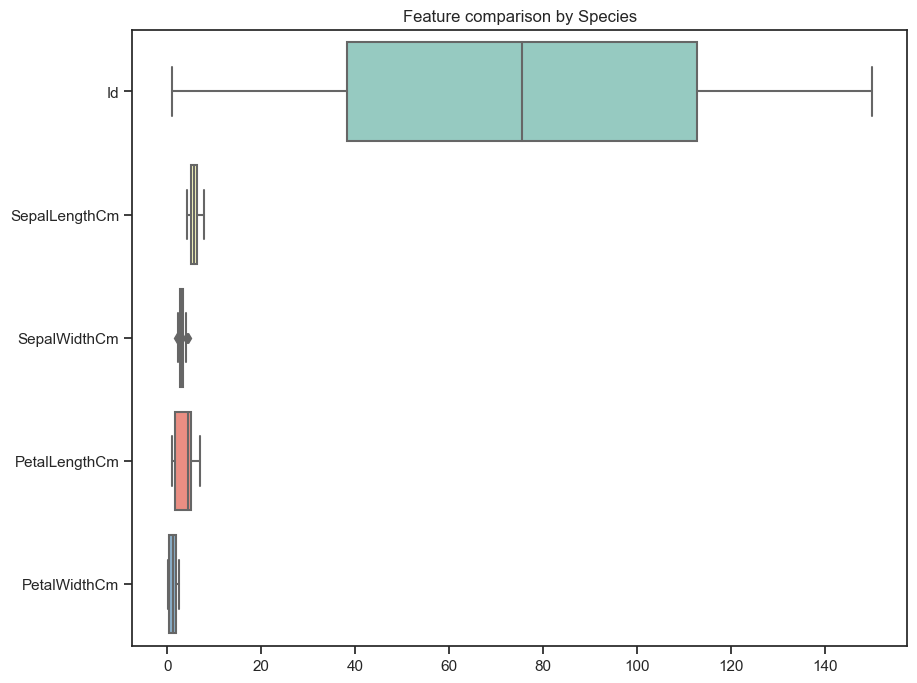

In [11]:
#Boxplots to compare feautures across different species
plt.figure(figsize=(10,8))
plt.title("Feature comparison by Species")
sns.boxplot(data=df.drop("Species",axis=1),orient="h",palette="Set3")

<Axes: title={'center': 'Correlation Matrix'}>

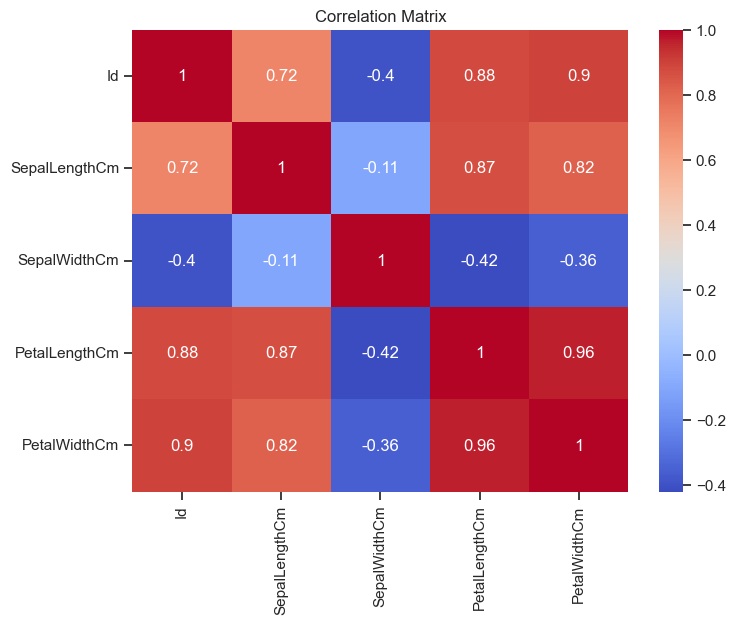

In [12]:
# Calculate and display the correlation matrix
corr_matrix = df.drop('Species', axis=1).corr()
plt.figure(figsize=(8, 6))
plt.title("Correlation Matrix")
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

<Axes: title={'center': 'Species Distribution'}, xlabel='Species', ylabel='count'>

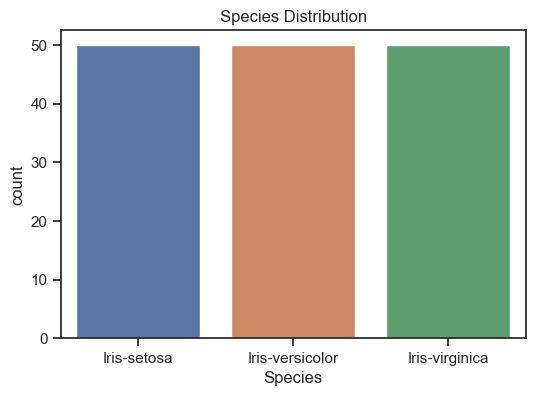

In [13]:
# Show the species distribution
plt.figure(figsize=(6, 4))
plt.title("Species Distribution")
sns.countplot(data=df, x='Species')

<Axes: title={'center': 'Feature Distribution by Species'}, xlabel='Species', ylabel='PetalWidthCm'>

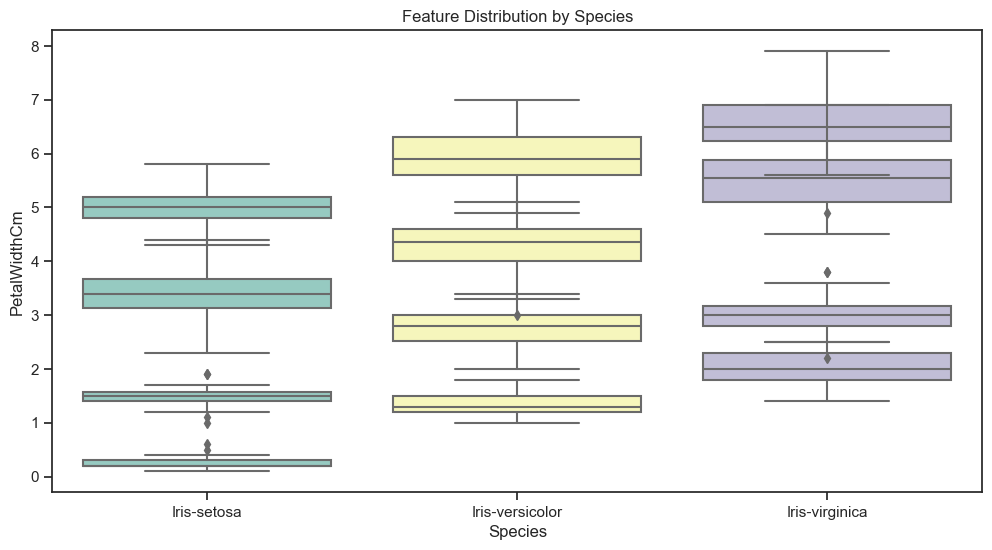

In [14]:
# Show the box plots for each feature by species
plt.figure(figsize=(12, 6))
plt.title("Feature Distribution by Species")
sns.boxplot(data=df, x='Species', y='SepalLengthCm', palette="Set3")
sns.boxplot(data=df, x='Species', y='SepalWidthCm', palette="Set3")
sns.boxplot(data=df, x='Species', y='PetalLengthCm', palette="Set3")
sns.boxplot(data=df, x='Species', y='PetalWidthCm', palette="Set3")

## Developing the model

In [15]:
# Split the dataset into features (X) and target variable (y)
X = df.drop('Species', axis=1)
y = df['Species']

In [16]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
# Scale the features using standardization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [18]:
# Create a logistic regression model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

In [19]:
X_train

array([[-1.21030717, -1.47393679,  1.22037928, -1.5639872 , -1.30948358],
       [-1.37240188, -0.13307079,  3.02001693, -1.27728011, -1.04292204],
       [-0.21458252,  1.08589829,  0.09560575,  0.38562104,  0.28988568],
       [-1.46502743, -1.23014297,  0.77046987, -1.21993869, -1.30948358],
       [-0.74717943, -1.7177306 ,  0.32056046, -1.39196294, -1.30948358],
       [ 1.66108484,  0.59831066, -1.25412249,  0.72966956,  0.95628954],
       [-0.53877194,  0.72020757,  0.32056046,  0.44296246,  0.42316645],
       [-1.09452523, -0.74255534,  0.99542457, -1.27728011, -1.30948358],
       [-1.62712214, -0.98634915,  1.22037928, -1.33462153, -1.30948358],
       [-0.9787433 , -0.74255534,  2.34515281, -1.27728011, -1.44276436],
       [ 1.56845929, -0.01117388, -0.80421307,  0.78701097,  0.95628954],
       [ 0.24854522,  0.23261993,  0.77046987,  0.44296246,  0.55644722],
       [ 0.27170161,  1.08589829,  0.09560575,  0.5576453 ,  0.42316645],
       [-1.34924549, -0.49876152,  1.8

In [20]:
y_train

22         Iris-setosa
15         Iris-setosa
65     Iris-versicolor
11         Iris-setosa
42         Iris-setosa
            ...       
71     Iris-versicolor
106     Iris-virginica
14         Iris-setosa
92     Iris-versicolor
102     Iris-virginica
Name: Species, Length: 120, dtype: object

In [21]:
y_test

73     Iris-versicolor
18         Iris-setosa
118     Iris-virginica
78     Iris-versicolor
76     Iris-versicolor
31         Iris-setosa
64     Iris-versicolor
141     Iris-virginica
68     Iris-versicolor
82     Iris-versicolor
110     Iris-virginica
12         Iris-setosa
36         Iris-setosa
9          Iris-setosa
19         Iris-setosa
56     Iris-versicolor
104     Iris-virginica
69     Iris-versicolor
55     Iris-versicolor
132     Iris-virginica
29         Iris-setosa
127     Iris-virginica
26         Iris-setosa
128     Iris-virginica
131     Iris-virginica
145     Iris-virginica
108     Iris-virginica
143     Iris-virginica
45         Iris-setosa
30         Iris-setosa
Name: Species, dtype: object

In [22]:
print(classification_report(y_pred, y_test))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



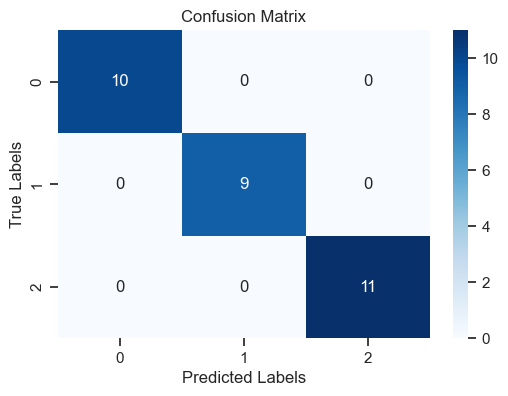

In [23]:
# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [24]:
# Evaluate the model's performance
accuracy = model.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 1.0


In [25]:
## For more models.....

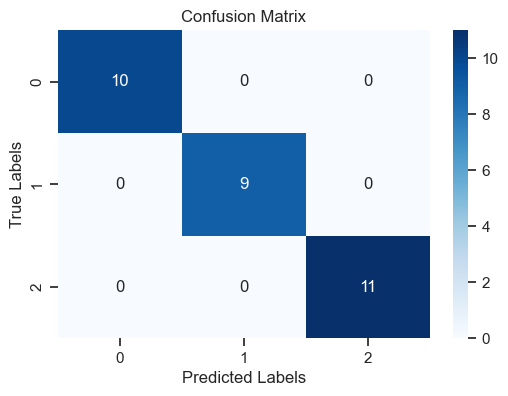

Logistic Regression Accuracy: 1.0


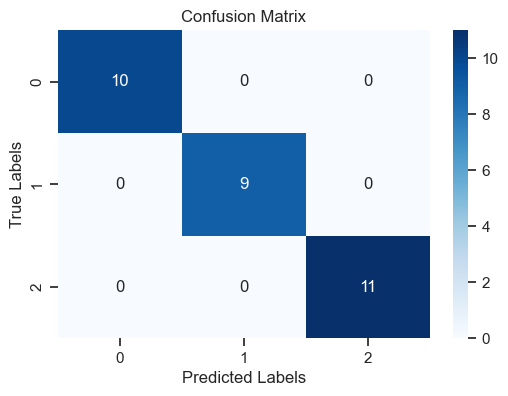

Support Vector Machine Accuracy: 1.0


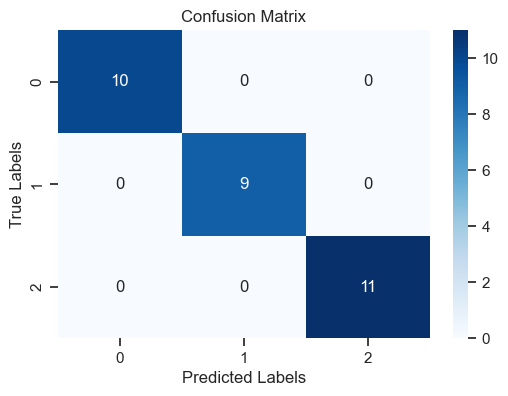

Decision Tree Accuracy: 1.0


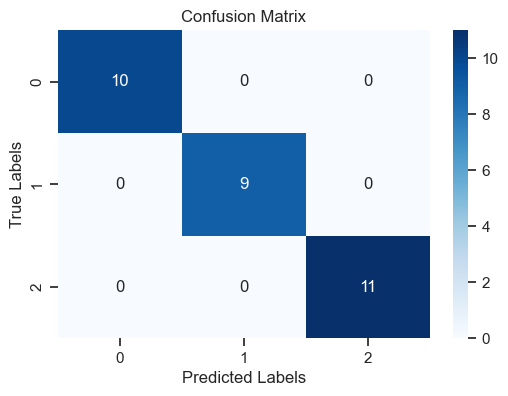

Random Forest Accuracy: 1.0


In [26]:
# Create a dictionary of models
models = {
    'Logistic Regression': LogisticRegression(),
    'Support Vector Machine': SVC(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier()
}

# Train and evaluate each model
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions on the testing set
    y_pred = model.predict(X_test)
    
    # Create a confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

    # Evaluate the model's performance
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{model_name} Accuracy:", accuracy)

## Conclusion

All four models achieved the same accuracy of 1.0, indicating that they performed equally well on the iris flower classification task.

In conclusion, a machine learning model was successfully developed and evaluated for classifying iris flowers into their respective species based on their measurements. The models achieved high accuracy, demonstrating their effectiveness in predicting the iris flower species.